In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix

/home/ahrorjon/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def load_dataset():
    url = 'iris.csv'
    dataset = pd.read_csv(url)
    return dataset
dataset = load_dataset()

In [3]:
def summarize_dataset(dataset):
    print(f"Dataset dimension:\n{dataset.shape}\n")
    print(f"First 10 rows of dataset:\n{dataset.head(10)}\n")
    print(f"Statistical summary:\n{dataset.describe()}\n")
    print(f"Class Distribution:\n{dataset.groupby('class').size()}")
summarize_dataset(dataset=dataset)

Dataset dimension:
(150, 5)

First 10 rows of dataset:
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

Statistical summary:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.7586

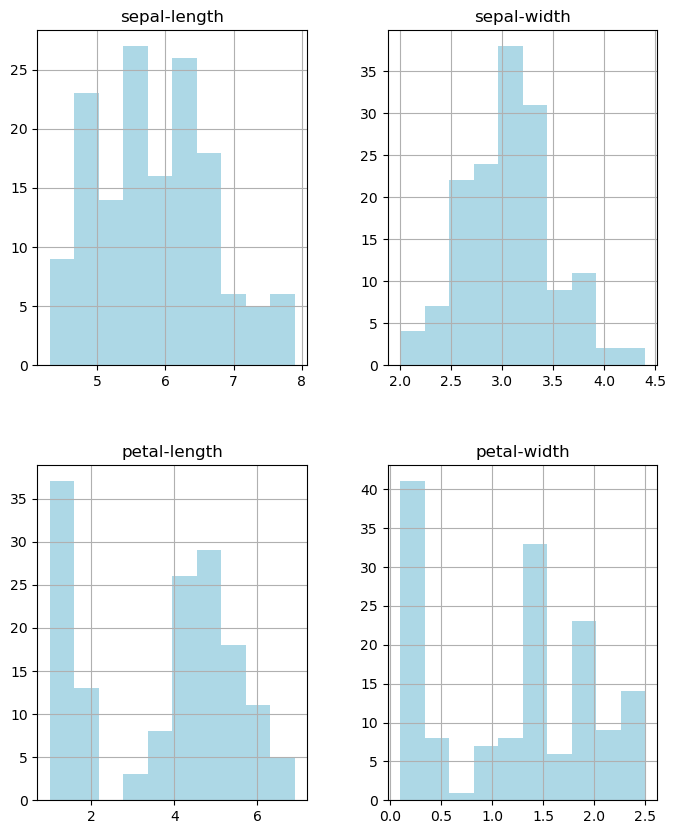

In [4]:
def print_plot_univariate(dataset):
    dataset.hist(figsize=(8,10), color="lightblue")
    plt.show()
print_plot_univariate(dataset = dataset)

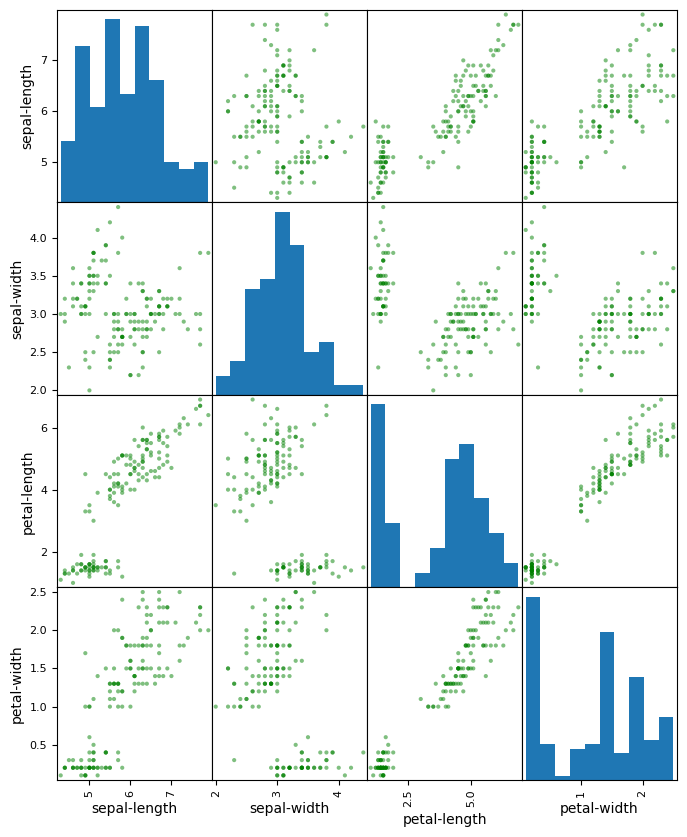

In [5]:
def print_plot_multivariate(dataset):
    scatter_matrix(dataset, figsize=(8,10), color="g")
    plt.show()
print_plot_multivariate(dataset=dataset)

In [13]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
modelA = tree.DecisionTreeClassifier()
modelB = GaussianNB()
modelC = KNeighborsClassifier()
modelD = LogisticRegression(solver='liblinear', multi_class='ovr')
modelE = LinearDiscriminantAnalysis()
modelF = SVC(gamma='auto')

In [15]:
mod_name = ['DecisionTree', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'LinearDiscriminant', 'SVM']
mod = [modelA, modelB, modelC, modelD, modelE, modelF]

for i in range(len(mod)):
    cv_results = cross_val_score(mod[i], X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    print('%s: %f (%f)' % (mod_name[i], cv_results.mean(), cv_results.std()))

DecisionTree: 0.883333 (0.016667)
GaussianNB: 0.950000 (0.016667)
KNeighbors: 0.941667 (0.025000)
LogisticRegression: 0.891667 (0.041667)
LinearDiscriminant: 0.975000 (0.008333)
SVM: 0.966667 (0.016667)
